## MDS - Multi Dimensional Scaling

Multidimensional Scaling is a distance preserving projection method and in general non-linear.

Let $D^{n\times n}$ be a dissimilarity matrix for n data points. Multidimensional scaling defines a mapping $f:D\Rightarrow X′$ onto some low-dimensional space $X′^{n×d}$ such that data points $d(x_i,x_j), X_i,x_j \in X′$ retains the dissimilarity as good as possible, i.e. $d(x_i,x_j) ≈ D_{i,j}$. The low-dimensional is also referred to as configuration or embedding


### Properties

* MDS approaches differ in the way how they utilize the dissimilarity matrix and on the semantics of “retaining” the dissimilarity
* The embedding is lossy and ambiguous in general, i.e. dissimilarities can not be preserved and different embeddings are possible
* The dimensionality of the embedding depends on the application: 1,2,3 for visualisation, k > 3 for dimensionality reduction
* MDS for visualisation allows to interact with points in the mapping and hence influence the mapping (explorative data analysis)



#### MDS in scikit-learn

* Import MDS via `from sklearn.manifold import MDS`
* Create the instance: `mds = MDS(...parameters...)
* transform data `transformed_data = mds.fit_transform(data)`

In the `MDS` construtor different metrics can be set. By default metric MDS is used and it is assumed that data are data points. Internally, scikit-learn applies a euclidean distance. If you want to use precomputed distances, it has to bes specified in the constructor (`dissimilarity="precomputed"`). Then data is interprted as distance matrix. 

#### Exercise: Visualise the IRIS data set

Load the IRIS data set and conduct a MDS. Plot the resulting data set and color code the classes.

Afterwards, change to a non-metric MDS by setting `metric=False`. The non-metric finds non-parametric monoton relationships. The embedded data retains the ranking among the data samples, but not the metric relationships.

Populating the interactive namespace from numpy and matplotlib


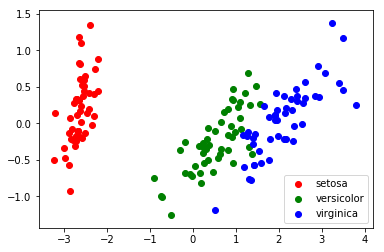

In [16]:
import pylab as pl
%pylab inline
from sklearn import datasets
from sklearn.decomposition import PCA
#load and prepare the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
# do the pca 
pca = PCA(n_components=2) #retain two components
model = pca.fit(X)
X_r = model.transform(X)
m = model.fit_transform(X)

def scatterHelp(X,y,labels, colors):
    l=np.unique(y)
    las =[]
    plots= []
    for i in l:
        mask=y==i
        plots.append(pl.scatter(X[mask,0],X[mask,1],color=colors[i]))
        las.append(labels[i])
  
    pl.legend(plots,las)

scatterHelp(X_r,y,iris.target_names,['r','g','b'])

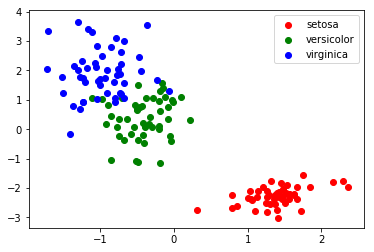

In [17]:
from sklearn.manifold import MDS
from sklearn import datasets

#load and prepare the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
# do the mds
mds = MDS(n_components=2,n_init=1, max_iter=1000) #retain two components
X_mds = mds.fit_transform(X)
scatterHelp(X_mds,y,iris.target_names,['r','g','b'])


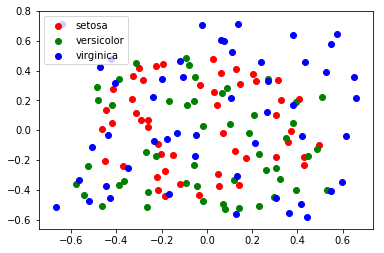

In [18]:
#now with manhatten
mds = MDS(metric=False, n_components=2,n_init=1, max_iter=1000) #retain two components
X_mds = mds.fit_transform(X)
scatterHelp(X_mds,y,iris.target_names,['r','g','b'])


#### Exercise 2: Apply MDS to digits data set

Load the digits data set and project the data onto a 2D space. Does it seem that classes are separable? Not that calculation may take a while.

Afterwards, change the similarity measure to a minkowski $L_1$ distance (Manhatten distance) and compare the results. Use  `sklearn.metrics.pairwise.manhattan_distances` to estimate the distances. Use `dissimilarity="precomputed"`as MDS parameter.

In [19]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

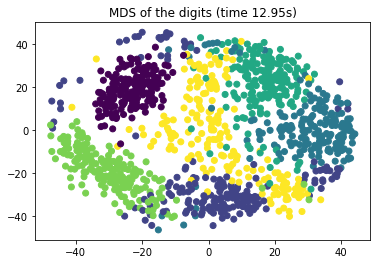

In [21]:
# do mds 
from time import time
t0 = time()
mds = MDS(n_components=2,n_init=1, max_iter=1000) #retain two components
X_mds = mds.fit_transform(X)
pl.scatter(X_mds[:,0],X_mds[:,1],c=y)
pl.title("MDS of the digits (time %.2fs)" %(time() - t0))
pl.show()

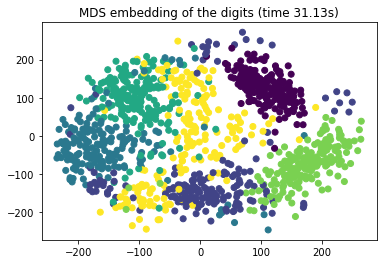

In [22]:
# do the pca 
from sklearn.metrics.pairwise import manhattan_distances
mds = MDS(n_components=2,n_init=1, max_iter=1000,dissimilarity="precomputed") #retain two components
X_mds = mds.fit_transform(manhattan_distances(X))
pl.scatter(X_mds[:,0],X_mds[:,1],c=y)
pl.title("MDS embedding of the digits (time %.2fs)" %(time() - t0))
pl.show()